# Artificial Data for TDABM

First let us import the necessary packages

In [375]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import networkx as nx
import sklearn
import statistics

We will also be using the BallMapper package and the Kepler Mapper package (https://kepler-mapper.scikit-tda.org/en/latest/index.html)

The lines are commented out as they are only needed once.

In [2]:
# pip install kmapper
# pip install pyballmapper

We import the two mapper algorithms

In [211]:
import kmapper as km
import pyballmapper as pbm

We now define a random data generator as we did in Chapter 4

In [212]:
def gen_random(n: int, d: int, covar: float, seed: int = 42) -> np.ndarray:
    ## new code should use 
    ## https://numpy.org/doc/stable/reference/random/generator.html
    rng = np.random.default_rng(seed=seed)

    cov_mat = np.ones((d, d)) * covar; np.fill_diagonal(cov_mat, 1)
    offset = np.zeros(d)

    return rng.multivariate_normal(offset, cov_mat)

Finally we have a function for producing bivariate data sets with given correlation

In [213]:
def corr2cov(p: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Covariance matrix from correlation & standard deviations"""
    d = np.diag(s)
    return d @ p @ d

We begin with the two bivariate data sets that were constructed in Chapter 4. However, we increase the number of points to 400

In [277]:
rng = np.random.default_rng(seed=1234)
x1a = rng.normal(size=400)
x2a = rng.normal(size=400)
xa = pd.DataFrame(x1a,x2a)
xa['X1'] = xa.index
xa.columns = ['X2','X1']
xa.reset_index(inplace=True, drop=True)

x1b = rng.uniform(0,1,400)
x2b = rng.uniform(0,1,400)
xb = pd.DataFrame(x1b,x2b)
xb['X1'] = xb.index
xb.columns = ['X2','X1']
xb.reset_index(inplace=True, drop=True)

Next we construct a new bivariate dataset that comprises 4 subclouds with different centres

In [278]:
rng = np.random.default_rng(seed=1234)

corr = np.array([[1., 0.00],
                  [0.00, 1.]])

stdev = np.array([1., 1.])
mean = np.array([0,0])

cov = corr2cov(corr, stdev)

xfp0 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp0 = pd.DataFrame(xfp0)
xfp0.columns = ['X1','X2']

# Update so second cluster is centered on 0 8

mean = np.array([0,8])

xfp1 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp1 = pd.DataFrame(xfp1)
xfp1.columns = ['X1','X2']

# Update so third cluster is centered on 8 8

mean = np.array([8,8])

xfp2 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp2 = pd.DataFrame(xfp2)
xfp2.columns = ['X1','X2']

# Update so fourth cluster is centered on 8 0

mean = np.array([8,0])

xfp3 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp3 = pd.DataFrame(xfp3)
xfp3.columns = ['X1','X2']

# Combine the data into a single data set

pieces = (xfp0,xfp1,xfp2,xfp3)

xc = pd.concat(pieces)

Let us plot the datasets as scatter plots

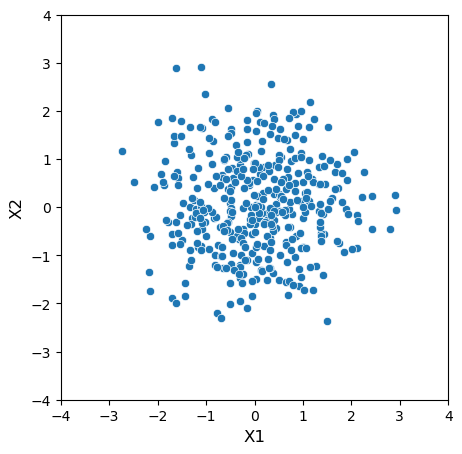

In [216]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1a , y = x2a , data = xa ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show() 

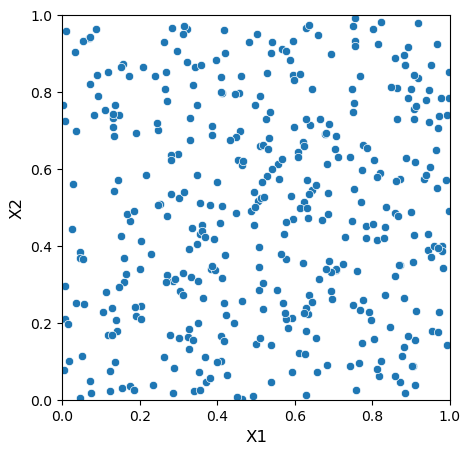

In [217]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1b , y = x2b , data = xb ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(0,1)
ax.set_ylim(0,1)
 
plt.show()

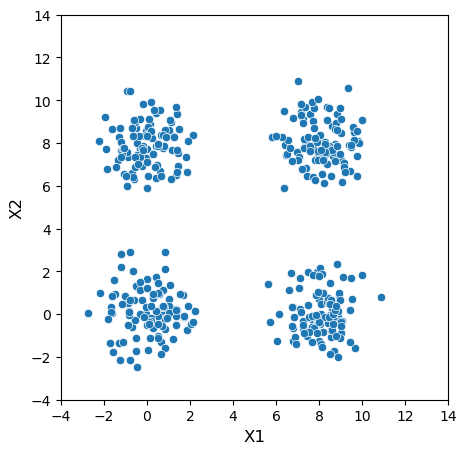

In [218]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = xc['X1'] , y = xc['X2'] , data = xc ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,14)
ax.set_ylim(-4,14)
 
plt.show()

Now a version of the 4 group dataset with strong correlation within group. This is data set D

In [279]:
rng = np.random.default_rng(seed=1234)

corr = np.array([[1., 0.70],
                  [0.70, 1.]])

stdev = np.array([1., 1.])
mean = np.array([0,0])

cov = corr2cov(corr, stdev)

xfp0 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp0 = pd.DataFrame(xfp0)
xfp0.columns = ['X1','X2']

# Update so second cluster is centered on 0 8

mean = np.array([0,8])

xfp1 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp1 = pd.DataFrame(xfp1)
xfp1.columns = ['X1','X2']

# Update so third cluster is centered on 8 8

mean = np.array([8,8])

xfp2 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp2 = pd.DataFrame(xfp2)
xfp2.columns = ['X1','X2']

# Update so fourth cluster is centered on 8 0

mean = np.array([8,0])

xfp3 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp3 = pd.DataFrame(xfp3)
xfp3.columns = ['X1','X2']

# Combine the data into a single data set

pieces = (xfp0,xfp1,xfp2,xfp3)

xd = pd.concat(pieces)

We generate the scatter plot from xd to show the contrast with the xc data set

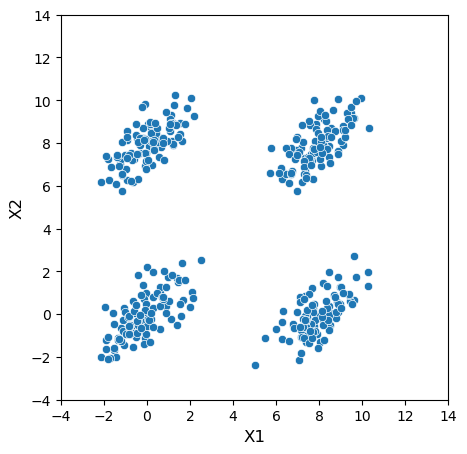

In [220]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = xd['X1'] , y = xd['X2'] , data = xd ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,14)
ax.set_ylim(-4,14)
 
plt.show()

We will produce TDABM plots for each of the four data sets, A-D. However, first we must ensure that the index column is correct on all datasets

In [265]:
xa.reset_index(inplace=True, drop=True)
xb.reset_index(inplace=True, drop=True)
xc.reset_index(inplace=True, drop=True)
xd.reset_index(inplace=True, drop=True)

In order to keep the flow of the notebook, we first talk about the construction of the multvariate case. 

# Multivariate Example

As a multivariate example let us construct a 5-dimensional data set with 4 clusters

In [280]:
rng = np.random.default_rng(seed=1234)

corr = np.array([[1., 0,0,0,0],
                  [0, 1.,0,0,0],[0,0,1.,0,0],[0,0,0,1.,0],[0,0,0,0,1.]])

stdev = np.array([1., 1.,1.,1.,1.])
mean = np.array([0,0,0,0,0])

cov = corr2cov(corr, stdev)

xfp0 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp0 = pd.DataFrame(xfp0)
xfp0.columns = ['X1','X2','X3','X4','X5']

# Update so second cluster is centered on 0 8 0 0 0

mean = np.array([0,8,0,0,0])

xfp1 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp1 = pd.DataFrame(xfp1)
xfp1.columns = ['X1','X2','X3','X4','X5']

# Update so third cluster is centered on 0 0 8 0 0

mean = np.array([0,0,8,0,0])

xfp2 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp2 = pd.DataFrame(xfp2)
xfp2.columns = ['X1','X2','X3','X4','X5']

# Update so fourth cluster is centered on 0 0 0 8 0

mean = np.array([0,0,0,8,0])

xfp3 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp3 = pd.DataFrame(xfp3)
xfp3.columns = ['X1','X2','X3','X4','X5']

# Combine the data into a single data set

pieces = (xfp0,xfp1,xfp2,xfp3)

xe = pd.concat(pieces)

In [222]:
## let's reset the index
xe.reset_index(inplace=True, drop=True)
xe

,X1,X2,X3,X4,X5
0,-1.603837,0.064100,0.740891,0.152619,0.863744
1,2.913099,-1.478823,0.945473,-1.666135,0.343745
2,-0.512444,1.323759,-0.860280,0.519493,-1.265144
3,-2.159139,0.434734,1.733289,0.520134,-1.002166
4,0.268346,0.767175,1.191272,-1.157411,0.696279
...,...,...,...,...,...
395,-1.356471,1.280209,0.371631,8.496802,1.017187
396,-0.138457,-0.377862,0.939677,8.035094,0.717118
397,0.115765,1.610406,-0.168978,8.375966,-2.113800
398,0.781869,0.061768,-0.354704,6.342979,0.458128


Let us produce the scatter plot which goes with the multivariate data set. This highlights the challenge of seeing a 5-dimensional data set in just two-dimensions.

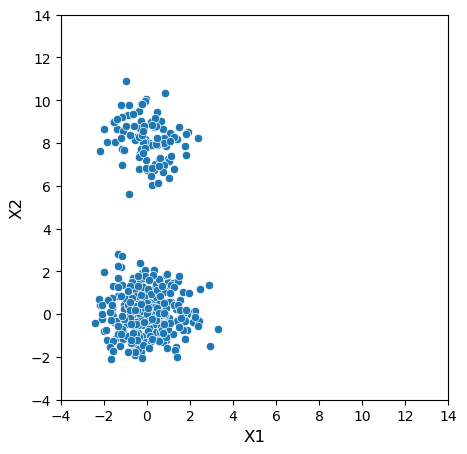

In [223]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = xe['X1'] , y = xe['X2'] , data = xe ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,14)
ax.set_ylim(-4,14)
 
plt.show()

When dealing with multiple variables it is natural to go for the plotting functionality of Seaborn. Here we show a pairplot for the data set. 

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


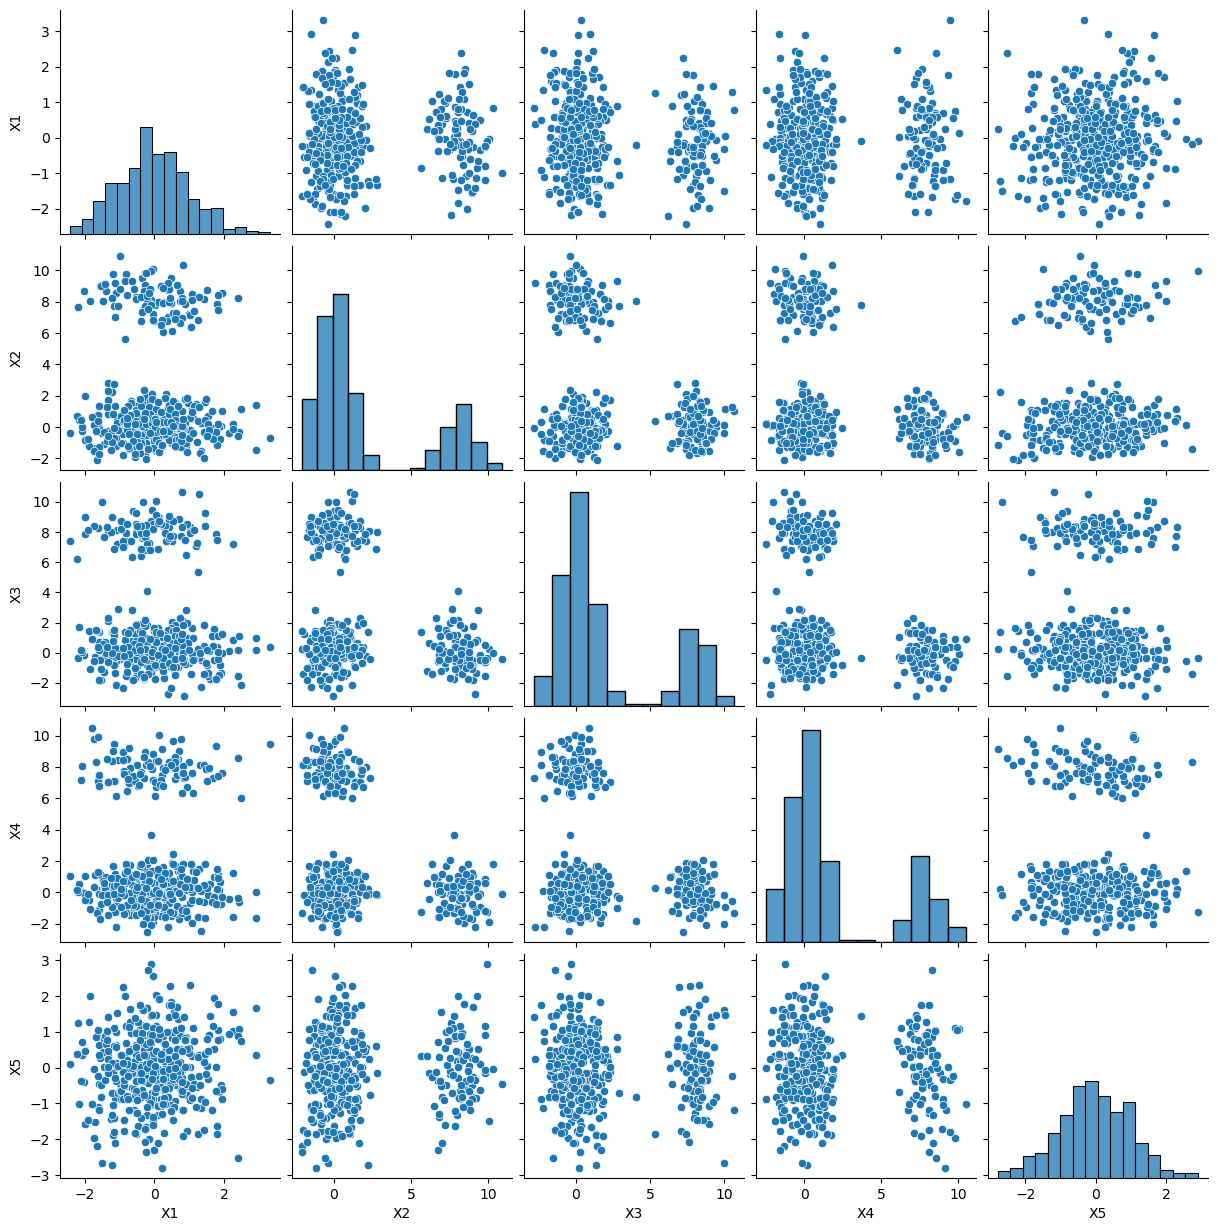

In [224]:
sb.pairplot(xe)

Finally we produce the outcome variable for the multivariate case

In [274]:
xe['Y']=xe['X1']+xe['X2']+xe['X3']+xe['X4']+xe['X5']

# Summary Statistics

We develop code for the summary statistics of a small data frame using a loop. The code here produced the mean, standard deviation, minimum, 25th percentile, median, 75th percentile and maximum

Note that although the data sets here are simple in structure, this loop approach is useful for your use in more complex analyses

In [438]:
df2 = xd[['X1','X2','Y']]

The basic dataset constructed from xa has 3 elements. Hence our summary statistics will have three rows. In the general case we can use the Python shape information. The columns are fixed however many rows.

In [434]:
sdep = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df2.shape[1]))

The loop used to fill in this summary statistic table uses the statistic package. We have:

In [439]:
for i in range(df2.shape[1]):
  sdep.loc[i,'Var'] = df2.columns[i]
  sdep.loc[i,'Mean'] = round(np.mean(df2.iloc[:,i]),3)
  sdep.loc[i,'SD'] = round(statistics.stdev(df2.iloc[:,i]),3)
  sdep.loc[i,'Min'] = round(min(df2.iloc[:,i]),3)
  sdep.loc[i,'q25'] = round(np.quantile(df2.iloc[:,i],0.25),3)
  sdep.loc[i,'q50'] = round(np.quantile(df2.iloc[:,i],0.50),3)
  sdep.loc[i,'q75'] = round(np.quantile(df2.iloc[:,i],0.75),3)
  sdep.loc[i,'Max'] = round(max(df2.iloc[:,i]),3)


sdep.head()

,Var,Mean,SD,Min,q25,q50,q75,Max
0,X1,3.926,4.097,-2.141,-0.07,3.761,7.795,10.325
1,X2,3.951,4.121,-2.358,-0.122,4.243,7.94,10.241
2,Y,7.877,5.928,-4.156,4.044,7.944,12.336,20.055


In [436]:
lout = pd.DataFrame(columns=['outp'], index=range(sdep.shape[0]))

In [440]:
for i in range(df2.shape[1]):
    lout.loc[i,'outp'] = ["&" + str(sdep.loc[i,'Var']) + "&" + str(sdep.loc[i,'Mean']) + "&" + str(sdep.loc[i,'SD']) + "&"+ str(sdep.loc[i,'Min']) + "&" + str(sdep.loc[i,'q25']) + "&"+ str(sdep.loc[i,'q50']) +  "&" + str(sdep.loc[i,'q75']) + "&"+ str(sdep.loc[i,'Max']) + "&"+"\\"]
                     
lout.to_csv('summaryd.txt', sep='\t', index=False)

lout.head()                

,outp
0,[&X1&3.926&4.097&-2.141&-0.07&3.761&7.795&10.3...
1,[&X2&3.951&4.121&-2.358&-0.122&4.243&7.94&10.2...
2,[&Y&7.877&5.928&-4.156&4.044&7.944&12.336&20.0...


In [386]:
test = ["&" + sdep.loc[,'Var'] + "&" + str(sdep.loc[0,'Mean'])+ "&" + str(sdep.loc[0,'Mean'])+ "&" + str(sdep.loc[0,'Mean'])+ "&" + str(sdep.loc[0,'Mean'])+ "&" + str(sdep.loc[0,'Mean']) +"\\"]

For the 5 variable case we can simply put the code into a single block

In [448]:
df2 = xe[['X1','X2','X3','X4','X5','Y']]
sdep = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df2.shape[1]))

for i in range(df2.shape[1]):
  sdep.loc[i,'Var'] = df2.columns[i]
  sdep.loc[i,'Mean'] = round(np.mean(df2.iloc[:,i]),3)
  sdep.loc[i,'SD'] = round(statistics.stdev(df2.iloc[:,i]),3)
  sdep.loc[i,'Min'] = round(min(df2.iloc[:,i]),3)
  sdep.loc[i,'q25'] = round(np.quantile(df2.iloc[:,i],0.25),3)
  sdep.loc[i,'q50'] = round(np.quantile(df2.iloc[:,i],0.50),3)
  sdep.loc[i,'q75'] = round(np.quantile(df2.iloc[:,i],0.75),3)
  sdep.loc[i,'Max'] = round(max(df2.iloc[:,i]),3)


lout = pd.DataFrame(columns=['outp'], index=range(sdep.shape[0]))

for i in range(df2.shape[1]):
    lout.loc[i,'outp'] = ["&" + str(sdep.loc[i,'Var']) + "&" + str(sdep.loc[i,'Mean']) + "&" + str(sdep.loc[i,'SD']) + "&"+ str(sdep.loc[i,'Min']) + "&" + str(sdep.loc[i,'q25']) + "&"+ str(sdep.loc[i,'q50']) +  "&" + str(sdep.loc[i,'q75']) + "&"+ str(sdep.loc[i,'Max']) + "\\"]
                     
lout.to_csv('summarye.txt', sep='\t', index=False)

lout.head() 

,outp
0,[&X1&-0.017&1.012&-2.423&-0.705&-0.071&0.608&3...
1,[&X2&2.05&3.654&-2.086&-0.375&0.367&3.511&10.9...
2,[&X3&2.082&3.609&-2.846&-0.371&0.438&4.402&10....
3,[&X4&1.975&3.556&-2.511&-0.408&0.491&4.246&10....
4,[&X5&-0.029&1.008&-2.787&-0.673&-0.024&0.687&2...


Next let us make a loop for constructing the correlation matrix

In [454]:
Corr_Matrix = round(xd.corr(),3)
print(Corr_Matrix)

lout = pd.DataFrame(columns=['outp'], index=range(Corr_Matrix.shape[0]))

for i in range(Corr_Matrix.shape[1]):
    lout.loc[i,'outp'] = ["&" + str(Corr_Matrix.iloc[i,0])+"&" + str(Corr_Matrix.iloc[i,1]) + "&" + str(Corr_Matrix.iloc[i,2])]
    
lout.to_csv('corrd.txt', sep='\t', index=False)

lout.head() 

       X1     X2      Y
X1  1.000  0.041  0.719
X2  0.041  1.000  0.723
Y   0.719  0.723  1.000


,outp
0,[&1.0&0.041&0.719]
1,[&0.041&1.0&0.723]
2,[&0.719&0.723&1.0]


In [455]:
Corr_Matrix = round(xe.corr(),3)
print(Corr_Matrix)

lout = pd.DataFrame(columns=['outp'], index=range(Corr_Matrix.shape[0]))

for i in range(Corr_Matrix.shape[1]):
    lout.loc[i,'outp'] = ["&" + str(Corr_Matrix.iloc[i,0])+"&" + str(Corr_Matrix.iloc[i,1]) + "&" + str(Corr_Matrix.iloc[i,2])+ "&" + str(Corr_Matrix.iloc[i,3])+ "&" + str(Corr_Matrix.iloc[i,4])+ "&" + str(Corr_Matrix.iloc[i,5])+"\\"]
    
lout.to_csv('corre.txt', sep='\t', index=False)

lout.head() 

       X1     X2     X3     X4     X5      Y
X1  1.000  0.003 -0.112  0.010  0.076  0.183
X2  0.003  1.000 -0.295 -0.324  0.020  0.367
X3 -0.112 -0.295  1.000 -0.326 -0.009  0.314
X4  0.010 -0.324 -0.326  1.000 -0.019  0.297
X5  0.076  0.020 -0.009 -0.019  1.000  0.266
Y   0.183  0.367  0.314  0.297  0.266  1.000


,outp
0,[&1.0&0.003&-0.112&0.01&0.076&0.183\]
1,[&0.003&1.0&-0.295&-0.324&0.02&0.367\]
2,[&-0.112&-0.295&1.0&-0.326&-0.009&0.314\]
3,[&0.01&-0.324&-0.326&1.0&-0.019&0.297\]
4,[&0.076&0.02&-0.009&-0.019&1.0&0.266\]


## Kepler mapper

For each dataset we need to convert the data into a Numpy array. Let us do this for all with one block of code:

In [447]:
xaa = np.array(xa.iloc[:,0:1])
xba = np.array(xb.iloc[:,0:1])
xca = np.array(xc.iloc[:,0:1])
xda = np.array(xd.iloc[:,0:1])
xea = np.array(xe.iloc[:,0:5])

The implementation of Kepler mapper requires 5 steps. In the block below the 5 steps to visualize are set out with the appropriate explanatory notes 

In [259]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(xaa, projection=[0,1]) # X-Y axis

# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, xaa, cover=cover)

# Visualize it
mapper.visualize(graph, path_html="xaa.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (400, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (400, 2) using lens shaped (400, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

   > Found 0 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 1 clusters in hypercube 17.
Cube_18 is empty.

   > Found 1 clusters in hypercube 19.
   > Found 1

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

We may then produce the Kepler Mapper plot for the bivariate dataset with uniform distribution

In [260]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(xba, projection=[0,1]) # X-Y axis

# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, xba, cover=cover)

# Visualize it
mapper.visualize(graph, path_html="xba.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (400, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (400, 2) using lens shaped (400, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Fou

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

Now we turn to our 4 cluster data set, xc

In [261]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(xca, projection=[0,1]) # X-Y axis

# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, xca, cover=cover)

# Visualize it
mapper.visualize(graph, path_html="xca.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (400, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (400, 2) using lens shaped (400, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 3 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 0 clusters in hypercube 3.
   > Found 0 clusters in hypercube 4.
Cube_5 is empty.

   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 0 clusters in hypercube 9.
   > Found 2 clusters in hypercube 10.
   > Found 3 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 0 clusters in hypercube 14.
Cube_15 is empty.

   > Found 1 clusters in hypercube 16.
   > Foun

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [262]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(xda, projection=[0,1]) # X-Y axis

# Create a cover with 20 elements
cover = km.Cover(n_cubes=20)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, xda, cover=cover)

# Visualize it
mapper.visualize(graph, path_html="xda.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (400, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (400, 2) using lens shaped (400, 2)

Minimal points in hypercube before clustering: 3
Creating 400 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 0 clusters in hypercube 3.
Cube_4 is empty.

Cube_5 is empty.

   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
Cube_9 is empty.

   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
Cube_15 is empty.

Cube_16 is empty.

   > Found 2 clusters in hypercube 17.
   > Found 1 clusters in hyper

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [263]:
data = np.array(xd)

# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create a cover with 30 elements
cover = km.Cover(n_cubes=30)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=cover)

# Visualize it
mapper.visualize(graph, path_html="xd30.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (400, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (400, 2) using lens shaped (400, 2)

Minimal points in hypercube before clustering: 3
Creating 900 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

   > Found 1 clusters in hypercube 9.
Cube_10 is empty.

   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Found 0 clusters in hypercube 16.
Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

   > Found 0 clusters in hypercube 20.
   > Found 1 

   > Found 0 clusters in hypercube 289.
Cube_290 is empty.

Cube_291 is empty.

   > Found 1 clusters in hypercube 292.
   > Found 1 clusters in hypercube 293.
   > Found 1 clusters in hypercube 294.
   > Found 1 clusters in hypercube 295.
   > Found 1 clusters in hypercube 296.
   > Found 1 clusters in hypercube 297.
   > Found 1 clusters in hypercube 298.
Cube_299 is empty.

Cube_300 is empty.

   > Found 1 clusters in hypercube 301.
   > Found 1 clusters in hypercube 302.
   > Found 1 clusters in hypercube 303.
   > Found 1 clusters in hypercube 304.
   > Found 1 clusters in hypercube 305.
Cube_306 is empty.

Cube_307 is empty.

Cube_308 is empty.

   > Found 1 clusters in hypercube 309.
   > Found 1 clusters in hypercube 310.
   > Found 1 clusters in hypercube 311.
   > Found 1 clusters in hypercube 312.
Cube_313 is empty.

Cube_314 is empty.

Cube_315 is empty.

Cube_316 is empty.

   > Found 1 clusters in hypercube 317.
   > Found 1 clusters in hypercube 318.
   > Found 1 cluster

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

Finally, we look at the data set xe which has 4 clusters in 5-dimensions. Here the DBSCAN parameters are set to encourage the algorithm to produce an output analogous to the TDABM output later.

In [264]:
data = np.array(xe)

# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create a cover with 10 elements in each axis
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=cover,
                   clusterer=sklearn.cluster.DBSCAN(eps=3, min_samples=10))

# Visualize it
mapper.visualize(graph, path_html="xea.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (400, 5)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (400, 5) using lens shaped (400, 2)

Minimal points in hypercube before clustering: 10
Creating 100 hypercubes.
   > Found 0 clusters in hypercube 0.
   > Found 0 clusters in hypercube 1.
   > Found 0 clusters in hypercube 2.
Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

   > Found 0 clusters in hypercube 8.
   > Found 2 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

   > Found 1 clusters in hypercube 15.
Cube_16 is empty.

   > Found 3 clusters in hypercube 17.
   > Found 3 clusters in hypercube 18.
   > Found 3 clusters in hypercube 19.
   > Found 0 clusters in hypercube 20.
Cube_21 is e

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

## DBSCAN

In [229]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=10).fit(xe)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 0


In [230]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [231]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

In [ ]:
colors

In [ ]:
xy

In [ ]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = xe[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = xe[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )


In [ ]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(xe, labels):.3f}")

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


In [ ]:
unique_labels

In [ ]:
colors

In [ ]:
core_samples_mask

## pyBallMapper

In [429]:
xa['Y'] = xa['X1']+xa['X2']
xb['Y'] = xb['X1']+xb['X2']
xc['Y'] = xc['X1']+xc['X2']
xd['Y'] = xd['X1']+xd['X2']
xe['Y'] = xe['X1']+xe['X2']+xe['X3']+xe['X4']+xe['X5']

For each data set the process will be similar. First we define a coloring data frame (cdf) and an axis data frame (adf).

In [334]:
cdf = pd.DataFrame(xa['Y'])
adf = pd.DataFrame(xa[['X2','X1']])

Implementation of the TDABM algorithm simply requires that we used the BallMapper command. There are three inputs. Firstly, the axis variables are added. Secondly the radius is specified as eps. Finally, we tell Python which variable we would like to use as the coloration variable.

In [335]:
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)

We use the draw_networkx to produce a visualization of the TDABM plot. We add the colorbar at this stage.

<Axes: >

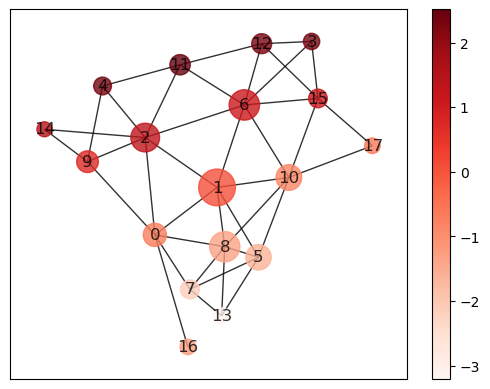

In [336]:
bm1.draw_networkx(coloring_variable='Y', colorbar=True)

As we are now familiar with the code let us run all steps in the same window for xb. Notice that the radius is changed for the TDABM plot becuase of how close the points in xb are to each other.

<Axes: >

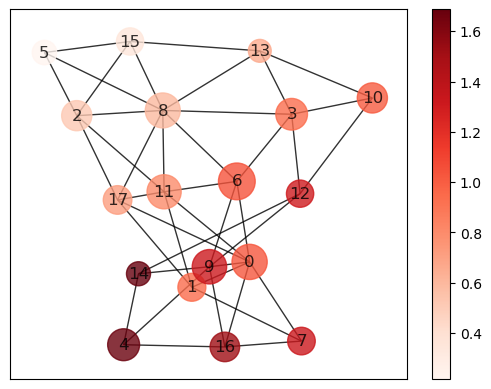

In [343]:
cdf = pd.DataFrame(xb['Y'])
adf = pd.DataFrame(xb[['X1','X2']])

bm1=pbm.BallMapper(X=adf, eps=0.2, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

Where we have constructed the data from multiple sub sets it is necessary to reset the index variable. We do so here for xc and xd

In [347]:
xc.reset_index(inplace=True, drop=True)
xd.reset_index(inplace=True, drop=True)

Now let us generate the TDABM plots for these datasets with radius 1

<Axes: >

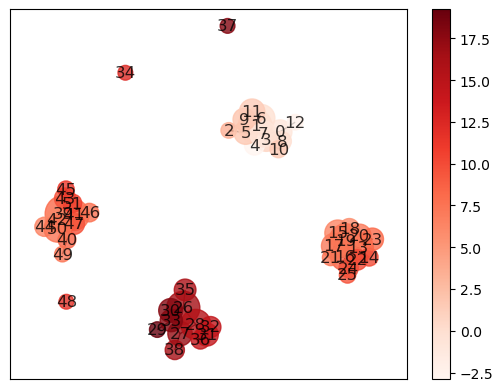

In [346]:
cdf = pd.DataFrame(xc['Y'])
adf = pd.DataFrame(xc[['X1','X2']])

bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

<Axes: >

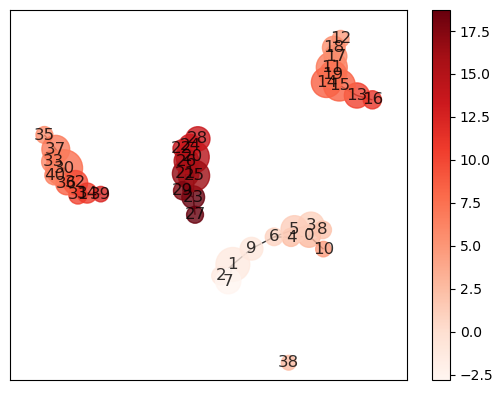

In [348]:
cdf = pd.DataFrame(xd['Y'])
adf = pd.DataFrame(xd[['X1','X2']])

bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

We now look at the role of radius. For these plots a single value is kept but you can edit the radius element of the code to produce alternatives

<Axes: >

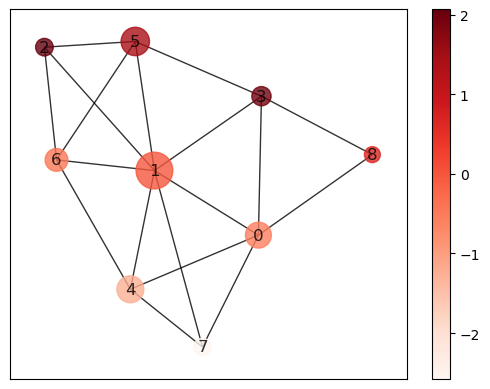

In [353]:
cdf = pd.DataFrame(xa['Y'])
adf = pd.DataFrame(xa[['X2','X1']])

# This is the line to change so that there is an alternative radius

bm1=pbm.BallMapper(X=adf, eps=1.5, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)


<Axes: >

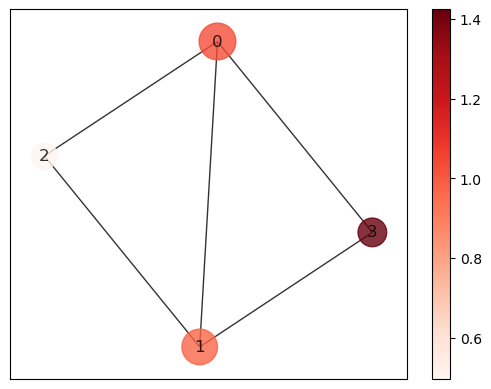

In [357]:
cdf = pd.DataFrame(xb['Y'])
adf = pd.DataFrame(xb[['X2','X1']])

# This is the line to change so that there is an alternative radius

bm1=pbm.BallMapper(X=adf, eps=0.5, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

<Axes: >

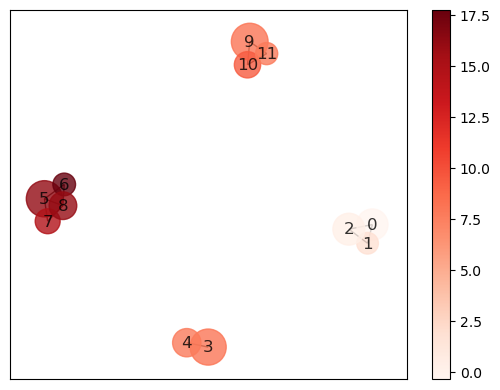

In [361]:
cdf = pd.DataFrame(xc['Y'])
adf = pd.DataFrame(xc[['X2','X1']])

# This is the line to change so that there is an alternative radius

bm1=pbm.BallMapper(X=adf, eps=2.5, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

<Axes: >

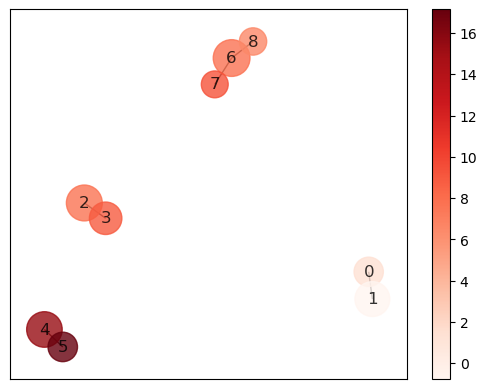

In [365]:
cdf = pd.DataFrame(xd['Y'])
adf = pd.DataFrame(xd[['X2','X1']])

# This is the line to change so that there is an alternative radius

bm1=pbm.BallMapper(X=adf, eps=2.5, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

Finally, let us consider the multivariate example. As with data sets C and D, there is a need to first reset the index.

In [367]:
xe.reset_index(inplace=True, drop=True)

In [368]:
Having reset the index we construct the TDABM plot in hte same way as before

SyntaxError: invalid syntax (460573082.py, line 1)

<Axes: >

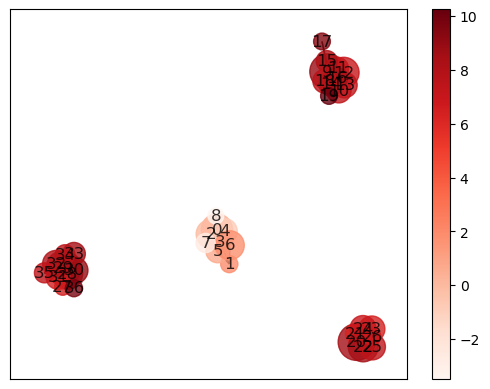

In [371]:
cdf = pd.DataFrame(xe['Y'])
adf = pd.DataFrame(xe[['X1','X2','X3','X4','X5']])

# This is the line to change so that there is an alternative radius

bm1=pbm.BallMapper(X=adf, eps=3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

We may also change the settings to have smaller, and larger epsilon. The only requirement is to change the pbm.BallMapper element of the process

<Axes: >

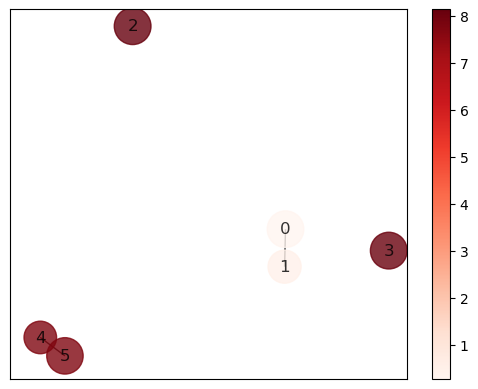

In [374]:
cdf = pd.DataFrame(xe['Y'])
adf = pd.DataFrame(xe[['X1','X2','X3','X4','X5']])

# This is the line to change so that there is an alternative radius

bm1=pbm.BallMapper(X=adf, eps=5, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)